The labelled faces dataset of sckit-learn contains gray scale images of 62 differnet famous personalites
from politics.we assume that there are no target labels, i.e. the names of
the persons are *unknown*. We want to find a method to cluster similar images. This can be done
using a _dimensionality reduction algorithm like PCA_ for feature generation and a subsequent
clustering e.g. using `DBSCAN`.

In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcParams['image.cmap'] = "gray"

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

For classification, we would have to take this into account. We extract
the first 50 images of each person and put them into a flat array called X_people. The
correspinding targets (y-values, names), are storeed in the y_people array.

 Traceback (most recent call last):
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\memory.py", line 516, in _cached_call
    out = self.store_backend.load_item(
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\_store_backends.py", line 170, in load_item
    item = numpy_pickle.load(f)
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\numpy_pickle.py", line 648, in load
    obj = _unpickle(fobj)
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\numpy_pickle.py", line 577, in _unpickle
    obj = unpickler.load()
  File "c:\Users\nariv\anaconda3\lib\pickle.py", line 1210, in load
    dispatch[key[0]](self)
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\numpy_pickle.py", line 415, in load_build
    self.stack.append(array_wrapper.read(self))
  File "C:\Users\nariv\AppData\Roaming\Python\Python38\site-packages\joblib\numpy_pickle.py", line 252, in read
   

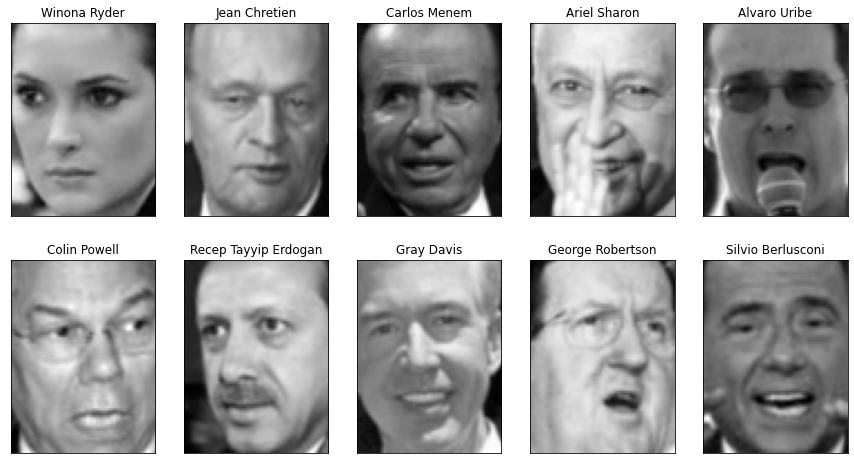

In [3]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [5]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [6]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [7]:
87*65

5655

In [8]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

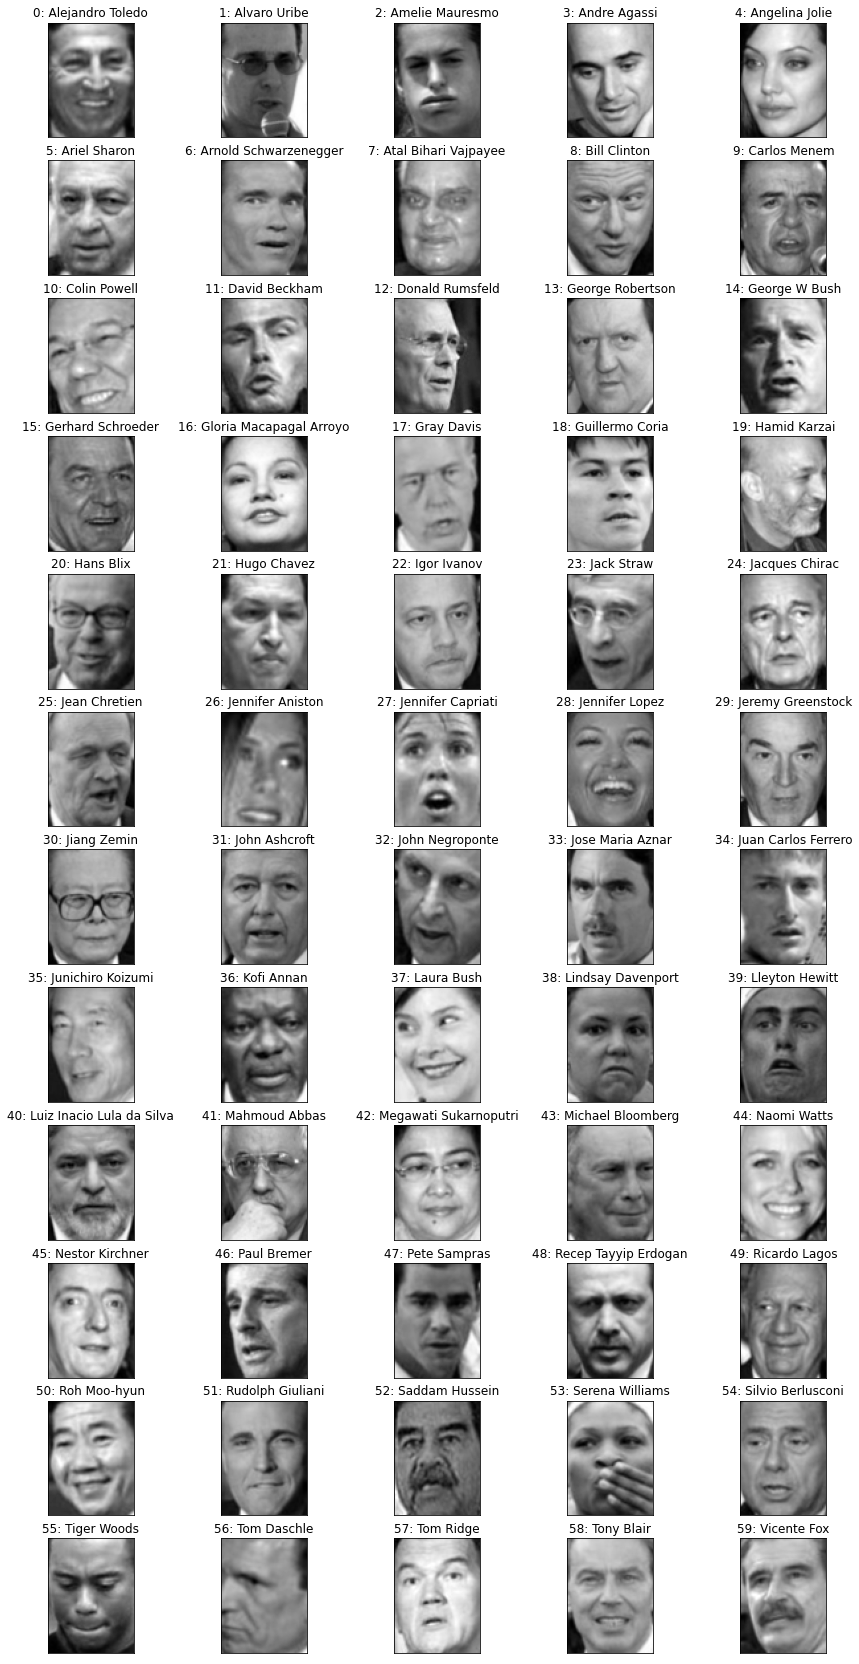

In [9]:
NumberOfPeople=np.unique(people.target).shape[0]
TargetNames  = [];
n=5

#show the first 5 images from each person
fig, axes = plt.subplots(12, 5, figsize=(15, 30),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target,ax in zip(np.unique(people.target),axes.ravel()):
    #get the first n pictures from each person
    indices=np.where(people.target == target)[0][1:n+1]
    TargetNames.append(people.target_names[target])
    
    image=people.images[indices[0]]
    ax.imshow(image)
    ax.set_title(str(target)+': '+TargetNames[target])

    

Apply a principal component analysis `X_pca=pca.fit_transform(X_people)` and
extract the first 100 components of each image. Reconstruct the first 10 entries of the dataset
using the 100 components of the PCA transformed data by applying the
`pca.inverse_transform` method and reshaping the image to the original size using
np.reshape. 


In [10]:
NumberOfPeople

62

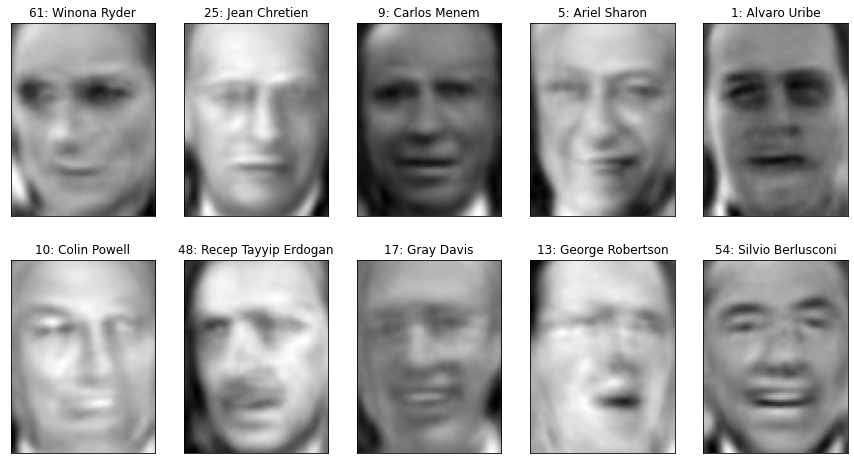

In [11]:
#extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)
#X_pca = pca.transform(X_people)

image_shape = people.images[0].shape
NumberOfSamples=X_pca.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for ix, target, ax in zip(np.arange(NumberOfSamples), y_people, axes.ravel()):
    image=np.reshape(pca.inverse_transform(X_pca[ix,:]),image_shape)
    ax.imshow(image)
    ax.set_title(str(y_people[ix])+': '+people.target_names[target])


In [12]:
# apply DBSCAN with default parameters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Change the parameter eps of the dbscan using `dbscan(min_samples=3, eps=5)`. Change
the value of eps in the range from 5 to 10 in steps of 0.5 using a for loop and check for
each value of eps how many clusters could be determined.

In [ ]:
for eps in np.linspace(7,8,10):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

Select the value of `eps` where the numbers of clusters found is maximum and plot the
members of the clusters found using the follwing python code.

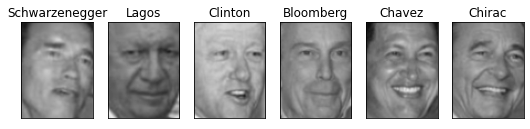

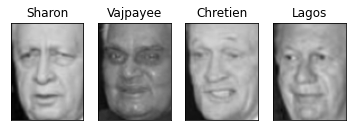

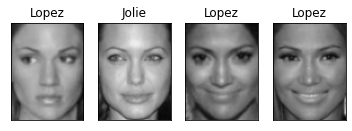

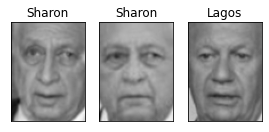

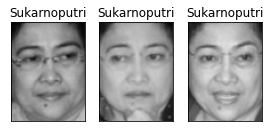

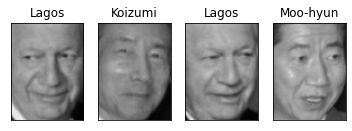

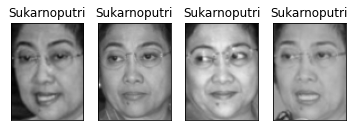

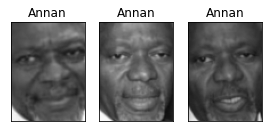

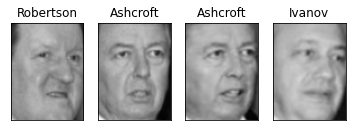

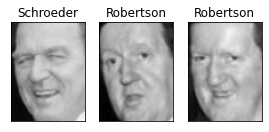

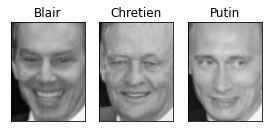

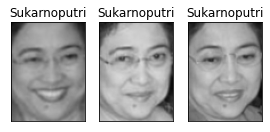

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7.44)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    if n_images<7:
        fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
        for image, label, ax in zip(X_people[mask], y_people[mask], axes):

            ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
            ax.set_title(people.target_names[label].split()[-1])

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=14)
SpectralClustering: 5.8 sec
labels found: 14
_____________________________________________
       SpectralClustering                                     
_____________________________________________
max image: 8



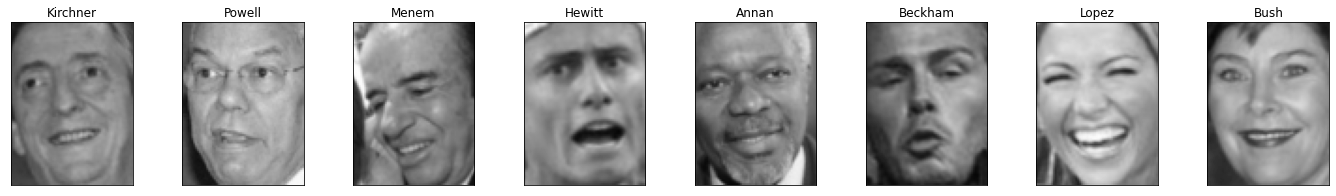

max image: 8



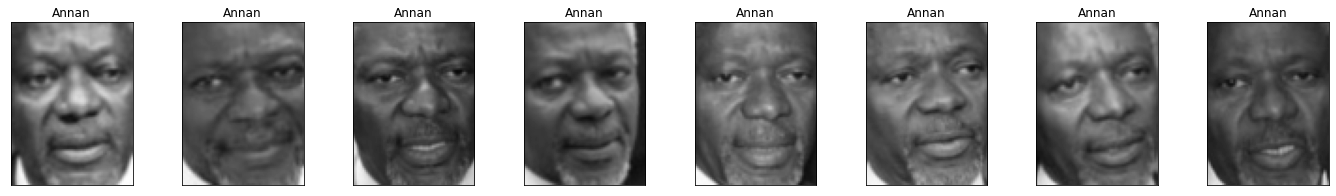

max image: 8



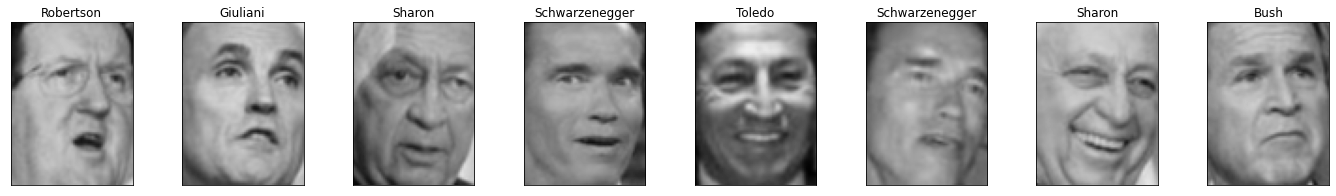

max image: 8



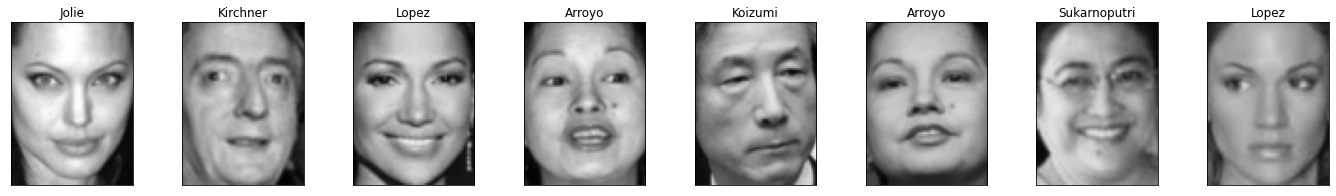

max image: 8



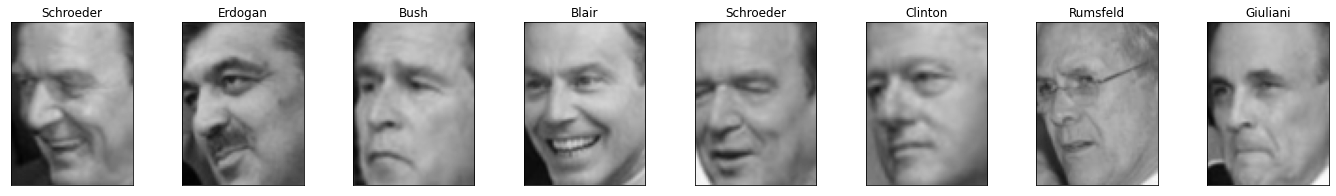

max image: 8



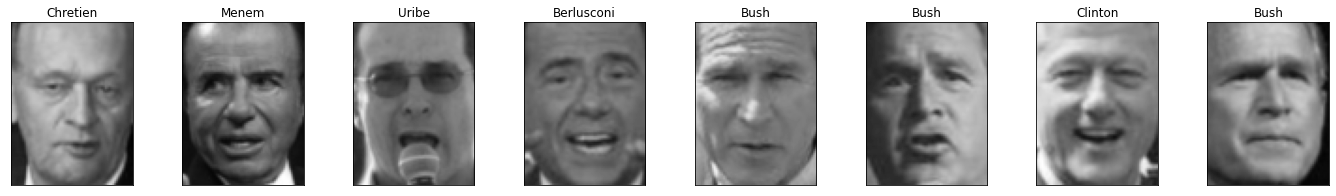

max image: 8



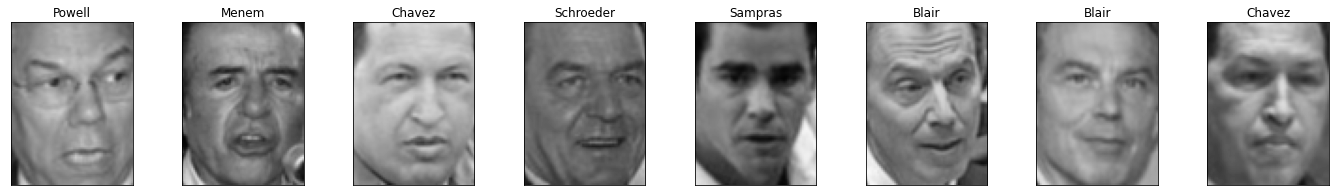

max image: 8



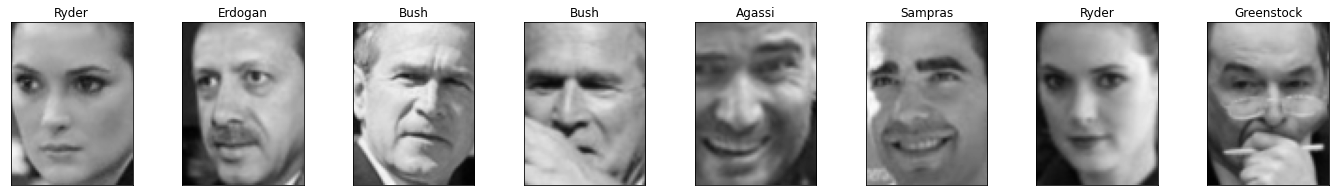

max image: 8



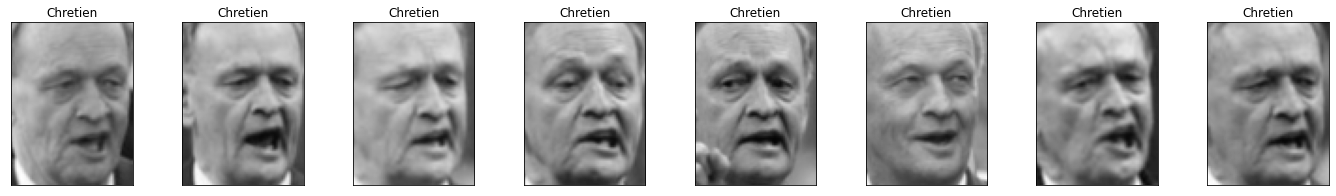

max image: 8



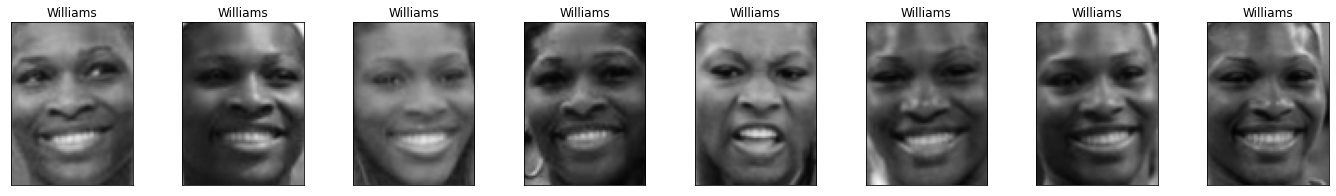

max image: 8



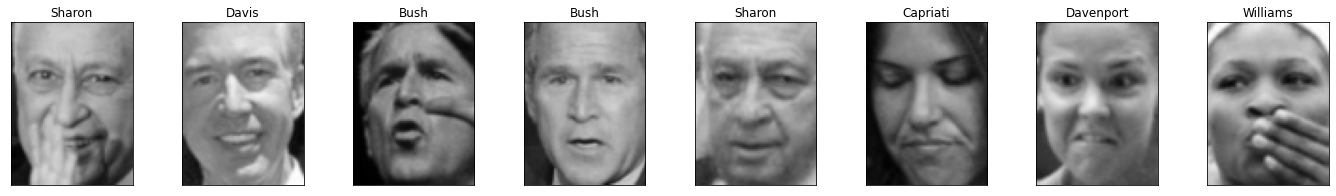

max image: 8



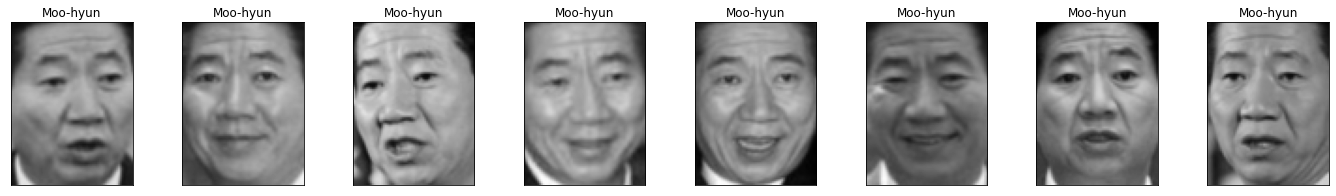

max image: 8



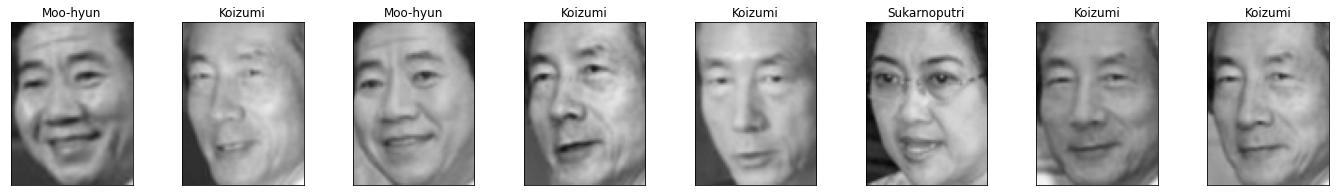

max image: 8



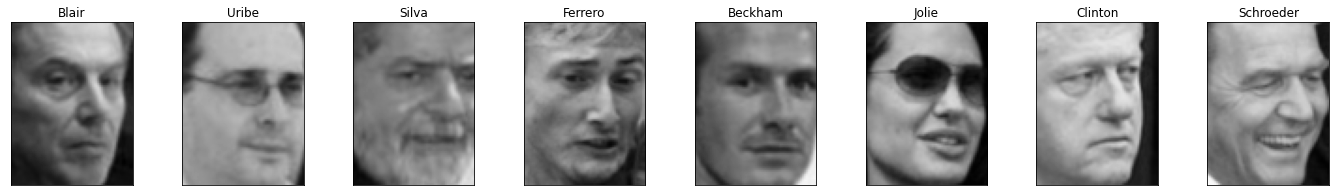

AgglomerativeClustering(connectivity=<2063x2063 sparse matrix of type '<class 'numpy.float64'>'
	with 53332 stored elements in Compressed Sparse Row format>,
                        n_clusters=14)
Ward: 4.5 sec
labels found: 14
_____________________________________________
       Ward                                     
_____________________________________________
max image: 8



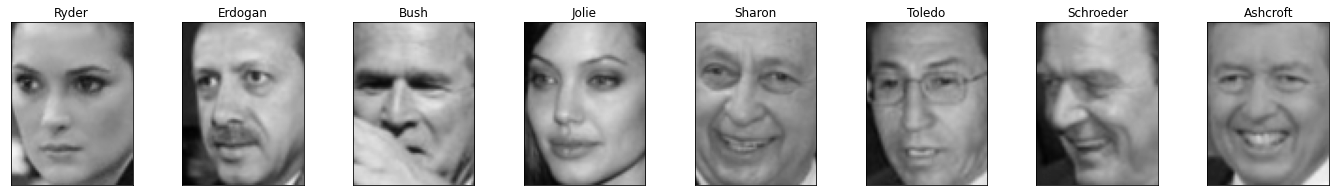

max image: 8



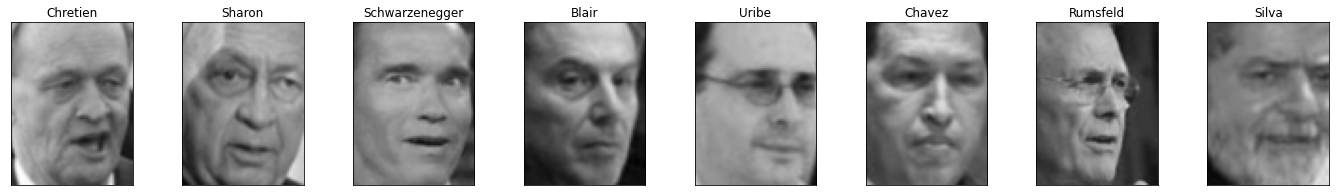

max image: 8



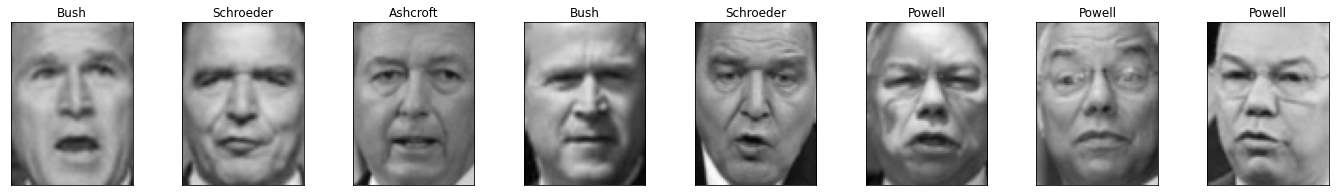

max image: 8



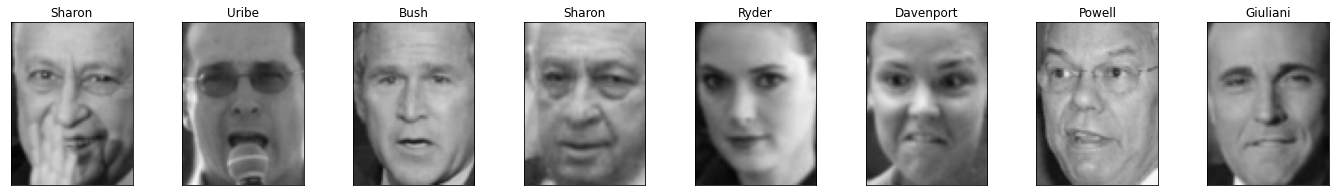

max image: 8



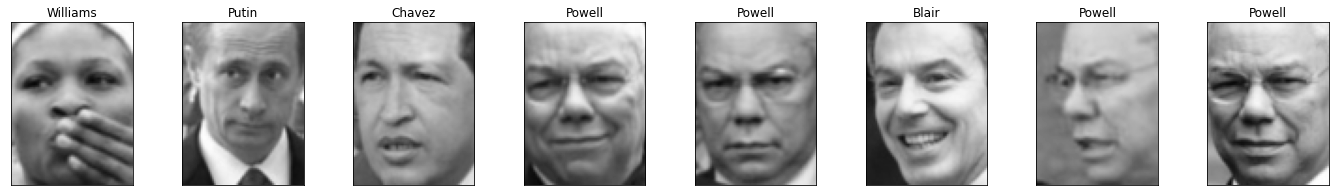

max image: 8



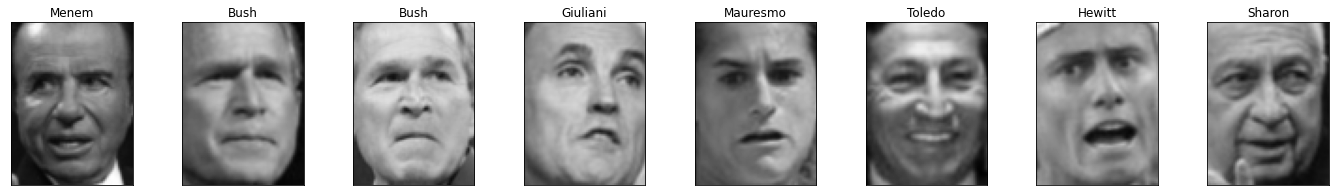

max image: 8



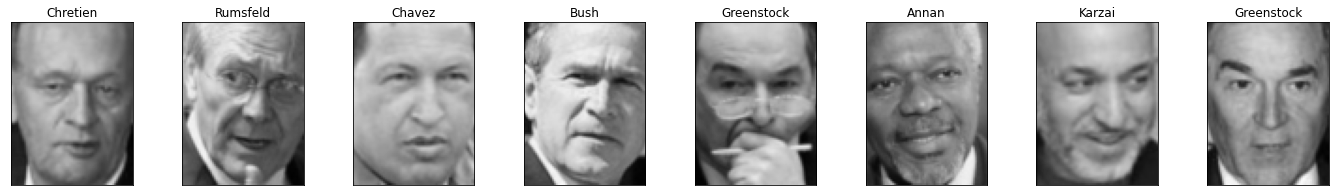

max image: 8



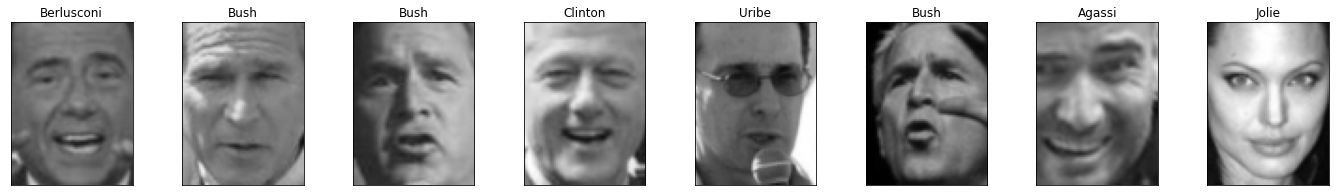

max image: 8



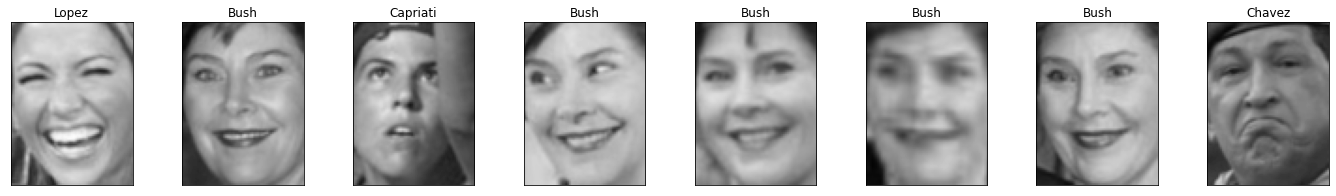

max image: 8



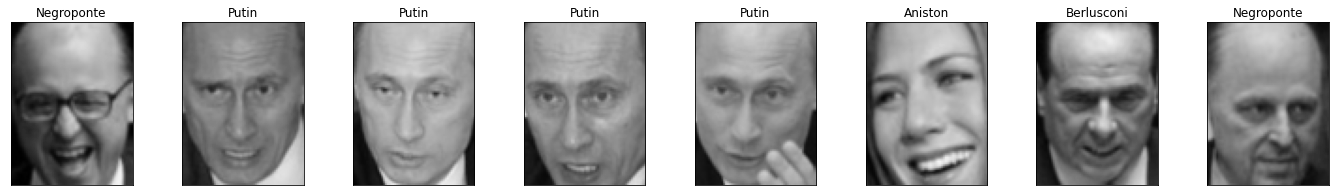

max image: 8



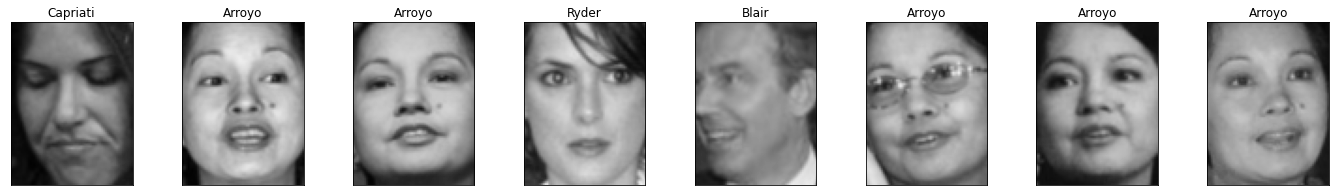

max image: 8



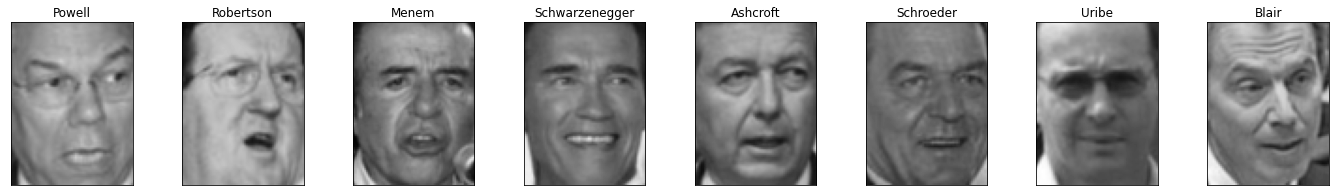

max image: 8



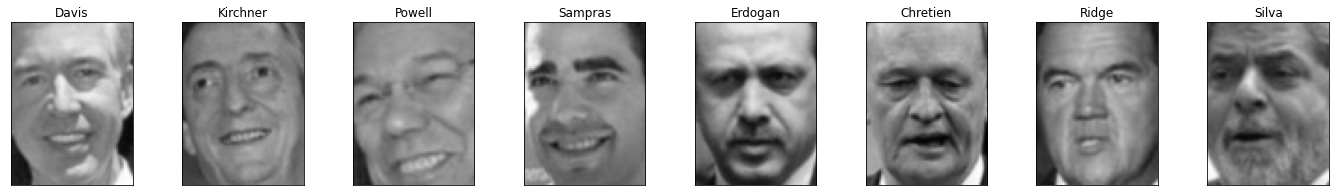

max image: 8



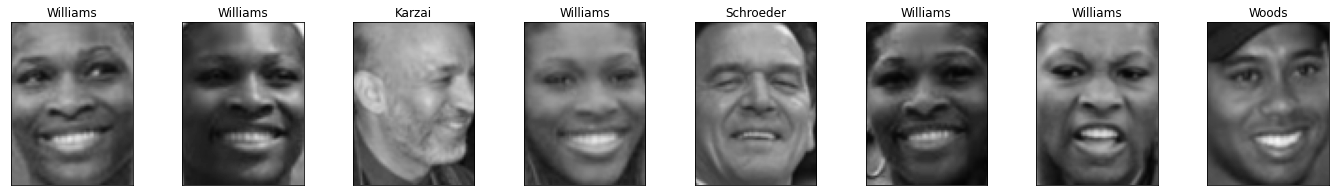

AgglomerativeClustering(affinity='cityblock',
                        connectivity=<2063x2063 sparse matrix of type '<class 'numpy.float64'>'
	with 53332 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=14)


In [ ]:
# %% using other cluster algorithms learner on the pca transformed data
from time import time
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph

n_clusters=14

clustering_names = ['SpectralClustering', 'Ward', 'AverageLinkage']

connectivity = kneighbors_graph(X_pca, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                                           connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=n_clusters,
        connectivity=connectivity)


clustering_algorithms = [spectral, ward, average_linkage]

# %matplotlib inline
for name, algorithm in zip(clustering_names, clustering_algorithms):
    # predict cluster memberships
    print(algorithm)
    t0 = time()
    algorithm.fit(X_pca)
    t1 = time()
        
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_.astype(np.int)
    else:
        labels = algorithm.predict(X_pca)
    
    print("%s: %.2g sec" % (name,t1 - t0))
    print('labels found: %i' % (max(labels) + 1))
    print("_____________________________________________")
    print("       %s                                     " % (name))
    print("_____________________________________________")
    
    for cluster in range(max(labels) + 1):
        mask = labels == cluster
        ind=np.where(mask==True)[0]
        n_images = np.size(ind)
        submask=np.zeros(X_pca.shape[0])
        submask=submask.astype(dtype=bool)
        submask[ind]=True
        #n_images =  np.sum(mask)
        #print(n_images)
            
        max_image=np.min([n_images,8])
        print('max image: %i\n' % (max_image))
        fig, axes = plt.subplots(1, max_image, figsize=(max_image * 3, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
        
        if max_image==1:
            print(ind[0])
            image=X_people[ind[0]]
            label=y_people[ind[0]]
            plt.imshow(image.reshape(image_shape), vmin=0, vmax=1)
            plt.title(people.target_names[label].split()[-1])
        else:
            for image, label, ax in zip(X_people[submask], y_people[submask], axes):
                ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
                ax.set_title(people.target_names[label].split()[-1])
        
        plt.show()